<a href="https://colab.research.google.com/github/uldkh/colab_projects/blob/main/6_Classification_cars_in_picture_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, SpatialDropout2D, Flatten, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import os, os.path
import gc

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x "/content/drive/My Drive/DataBases/Mercedes"
!unrar x "/content/drive/My Drive/DataBases/Renault"
!unrar x "/content/drive/My Drive/DataBases/Ferrari"

In [ ]:
random_img_size = Image.open("/content/cars/Ferrari/car_Ferrari__0.png").size

In [ ]:
models = ["Mercedes", "Renault", "Ferrari"]
directory_cars = "/content/cars/"
for model in models:
  dir = directory_cars + model
  print(f"{model} count - {len([name for name in os.listdir(dir) if os.path.isfile(os.path.join(dir, name))])}")
  print(f"{model} with another size - {len([name for name in os.listdir(dir) if Image.open(os.path.join(dir, name)).size != random_img_size])}")

Mercedes count - 1161
Mercedes with another size - 1
Renault count - 1178
Renault with another size - 0
Ferrari count - 1088
Ferrari with another size - 0


In [ ]:
for name in os.listdir(directory_cars + models[0]):
  if Image.open(os.path.join(directory_cars + models[0], name)).size != random_img_size:
    print(name, Image.open(directory_cars + models[0] + "/" + name).size)
    break

car__324.png (192, 107)


In [ ]:
random_img_size

(192, 108)

In [ ]:
train_path = "/content/cars"
batch_size = 55
img_width = int(random_img_size[0] * 1.5)
img_height = int(random_img_size[1] * 1.5)
print(img_width, img_height)

288 162


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    rescale=1/255, 
    horizontal_flip=True, 
    zoom_range=0.2, 
    validation_split=0.2)

In [ ]:
train_generator = datagen.flow_from_directory(
    directory=train_path, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, 
    subset="training")
    
valid_generator = datagen.flow_from_directory(
    directory=train_path, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, 
    subset="validation")

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


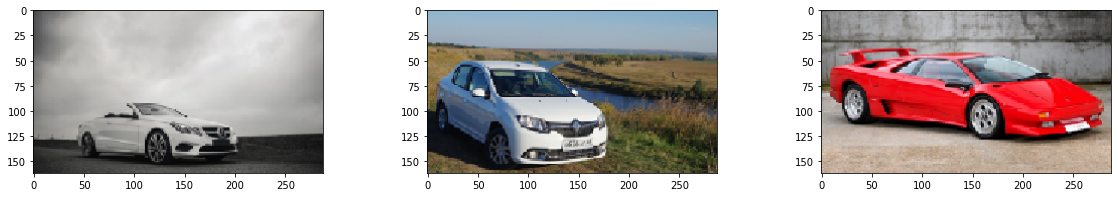

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 3))
for i in range(3):
  car_path = train_path + "/" + os.listdir(train_path)[i]
  img_path = car_path + "/" + random.choice(os.listdir(car_path))
  ax[i].imshow(image.load_img(img_path, target_size=(img_height, img_width)))

In [ ]:
def get_history_plot(history):

  plt.plot(history.history["accuracy"], label="train accuracy")
  plt.plot(history.history["val_accuracy"], label="val_accuracy")
  plt.xlabel("epoch")
  plt.ylabel("accuracy")
  plt.legend()
  plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(img_height, img_width, 3)))
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(Conv2D(512, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(1024, (3,3), padding="same", activation="relu"))
model.add(Conv2D(1024, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.3))

model.add(GlobalMaxPooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer=Adam(0.001), metrics="accuracy")
model.summary()

Epoch 1/30
49/49 [==============================] - 58s 1s/step - loss: 0.9013 - accuracy: 0.5632 - val_loss: 1.2022 - val_accuracy: 0.3364
Epoch 2/30
49/49 [==============================] - 57s 1s/step - loss: 0.9004 - accuracy: 0.5618 - val_loss: 1.4407 - val_accuracy: 0.3409
Epoch 3/30
49/49 [==============================] - 57s 1s/step - loss: 0.8900 - accuracy: 0.5811 - val_loss: 1.6884 - val_accuracy: 0.3379
Epoch 4/30
49/49 [==============================] - 58s 1s/step - loss: 0.8778 - accuracy: 0.5967 - val_loss: 1.2810 - val_accuracy: 0.3652
Epoch 5/30
49/49 [==============================] - 57s 1s/step - loss: 0.8605 - accuracy: 0.6001 - val_loss: 1.0605 - val_accuracy: 0.4455
Epoch 6/30
49/49 [==============================] - 58s 1s/step - loss: 0.8463 - accuracy: 0.6038 - val_loss: 1.0851 - val_accuracy: 0.4409
Epoch 7/30
49/49 [==============================] - 57s 1s/step - loss: 0.8358 - accuracy: 0.6008 - val_loss: 1.0627 - val_accuracy: 0.4758
Epoch 8/30
49/49 [==

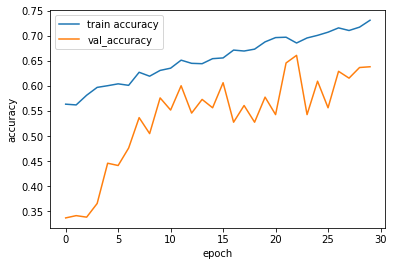

In [ ]:
history = model.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size, validation_data=valid_generator, validation_steps=valid_generator.samples//batch_size, epochs=30, verbose=1)
get_history_plot(history)

Epoch 1/30
49/49 [==============================] - 60s 1s/step - loss: 0.6831 - accuracy: 0.7150 - val_loss: 1.3013 - val_accuracy: 0.5561
Epoch 2/30
49/49 [==============================] - 57s 1s/step - loss: 0.6626 - accuracy: 0.7258 - val_loss: 0.8766 - val_accuracy: 0.6242
Epoch 3/30
49/49 [==============================] - 57s 1s/step - loss: 0.6535 - accuracy: 0.7191 - val_loss: 0.9493 - val_accuracy: 0.6455
Epoch 4/30
49/49 [==============================] - 57s 1s/step - loss: 0.6404 - accuracy: 0.7254 - val_loss: 0.8475 - val_accuracy: 0.6591
Epoch 5/30
49/49 [==============================] - 57s 1s/step - loss: 0.6511 - accuracy: 0.7344 - val_loss: 0.8494 - val_accuracy: 0.6682
Epoch 6/30
49/49 [==============================] - 57s 1s/step - loss: 0.6094 - accuracy: 0.7351 - val_loss: 0.9258 - val_accuracy: 0.6106
Epoch 7/30
49/49 [==============================] - 57s 1s/step - loss: 0.6142 - accuracy: 0.7374 - val_loss: 0.9862 - val_accuracy: 0.6818
Epoch 8/30
49/49 [==

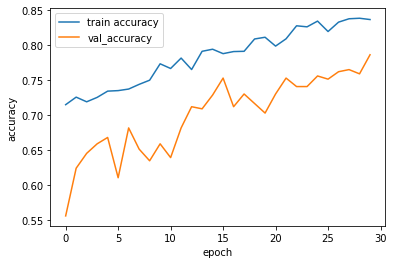

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001), metrics="accuracy")
history = model.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size, validation_data=valid_generator, validation_steps=valid_generator.samples//batch_size, epochs=30, verbose=1)
get_history_plot(history)

Epoch 1/30
49/49 [==============================] - 58s 1s/step - loss: 0.3824 - accuracy: 0.8501 - val_loss: 0.6939 - val_accuracy: 0.7576
Epoch 2/30
49/49 [==============================] - 57s 1s/step - loss: 0.4032 - accuracy: 0.8438 - val_loss: 0.9483 - val_accuracy: 0.7076
Epoch 3/30
49/49 [==============================] - 57s 1s/step - loss: 0.3708 - accuracy: 0.8564 - val_loss: 0.8968 - val_accuracy: 0.7227
Epoch 4/30
49/49 [==============================] - 57s 1s/step - loss: 0.3704 - accuracy: 0.8501 - val_loss: 0.6583 - val_accuracy: 0.7697
Epoch 5/30
49/49 [==============================] - 57s 1s/step - loss: 0.3723 - accuracy: 0.8497 - val_loss: 0.6437 - val_accuracy: 0.7818
Epoch 6/30
49/49 [==============================] - 57s 1s/step - loss: 0.3692 - accuracy: 0.8612 - val_loss: 0.5777 - val_accuracy: 0.8030
Epoch 7/30
49/49 [==============================] - 57s 1s/step - loss: 0.3714 - accuracy: 0.8557 - val_loss: 0.5705 - val_accuracy: 0.7970
Epoch 8/30
49/49 [==

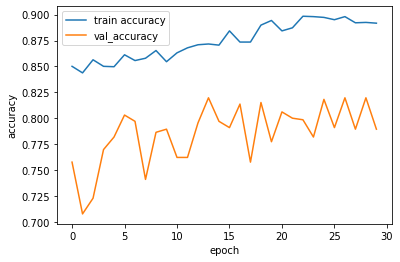

In [ ]:
history = model.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size, validation_data=valid_generator, validation_steps=valid_generator.samples//batch_size, epochs=30, verbose=1)
get_history_plot(history)

In [ ]:
model.save_weights("weights.h5")